<a href="https://colab.research.google.com/github/doaa450/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# CustomerID is the unique identifier and it doesn't provide us with any useful cluster information so we can drop it.
df = df.drop('CustomerID', axis=1)

In [ ]:
df.shape

(200, 4)

### Data Exploration

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


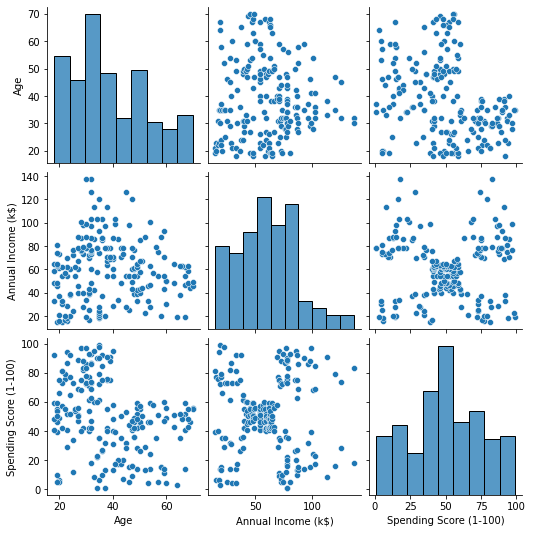

In [ ]:
# To get a better understanding of the dataset, we can construct a Pair plot and heatmap  of each of the three  features present in the data.
sns.pairplot(df)

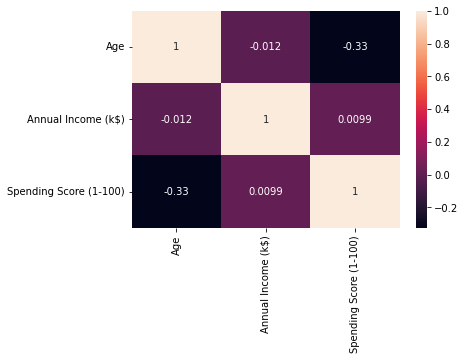

In [ ]:
sns.heatmap(df.corr(), annot=True)

from above we can conclude that there is no strong correlation between our features and there is weak negative correlation between spending score and age.

### Data Preprocessing

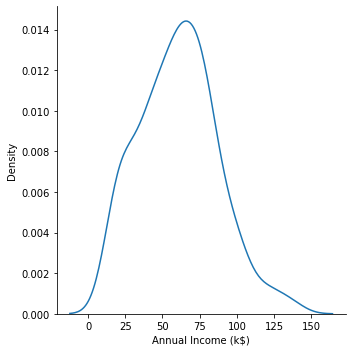

In [ ]:
# Annual Income (k$) Distribution 
sns.displot(df, x="Annual Income (k$)", kind="kde")

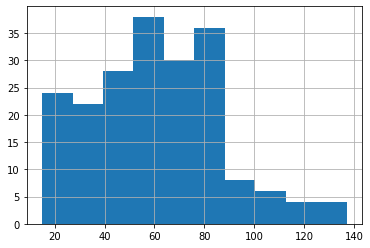

In [ ]:
df["Annual Income (k$)"].hist()

In [ ]:
df["income_cat"] = pd.cut(df["Annual Income (k$)"],
                               bins=[0, 30, 60, 90, 120, np.inf],
                               labels=[1, 2, 3, 4, 5])



In [ ]:
df["income_cat"].value_counts()

3    80
2    66
1    32
4    18
5     4
Name: income_cat, dtype: int64

In [ ]:
# Annual Income (k$) is not normally distributed, 

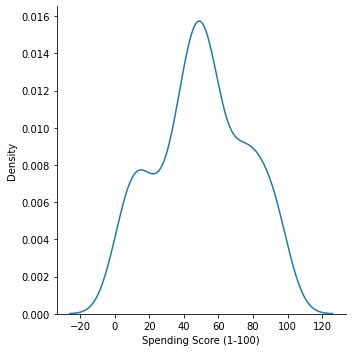

In [ ]:
# Spending Score (1-100) Distribution 
sns.displot(df, x="Spending Score (1-100)", kind="kde")

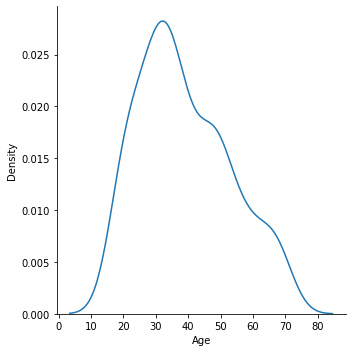

In [ ]:
# Spending Score (1-100) Distribution 
sns.displot(df, x="Age", kind="kde")

In [ ]:
#Implementation: Feature Scaling
df['log_income']=np.log(df['Annual Income (k$)'])

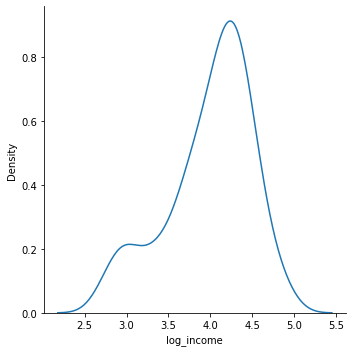

In [ ]:
sns.displot(df, x="log_income", kind="kde")

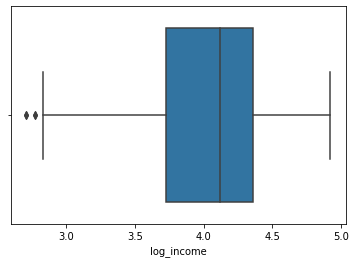

In [ ]:
# Implementation: Outlier Detection
sns.boxplot(x='log_income', data=df)

In [ ]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

In [ ]:
outliers = find_outliers_IQR(df['Annual Income (k$)'])
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 2
max outlier value: 137
min outlier value: 137


198    137
199    137
Name: Annual Income (k$), dtype: int64

In [ ]:
#refrences:https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

In [ ]:
outliers_log = find_outliers_IQR(df['log_income'])
outliers_log

0    2.708050
1    2.708050
2    2.772589
3    2.772589
Name: log_income, dtype: float64

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_cat,log_income
0,Male,19,15,39,1,2.708050
1,Male,21,15,81,1,2.708050
2,Female,20,16,6,1,2.772589
3,Female,23,16,77,1,2.772589
4,Female,31,17,40,1,2.833213


In [ ]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [ ]:
gender = df['Gender']
df = scaled_features.join(gender)

df = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

df = df.drop(['Gender_Male'],axis=1)

df.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


In [ ]:
df.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


### **Feature Transformation**

PCA is a technique that helps us reduce the dimension of a dataset. When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model.

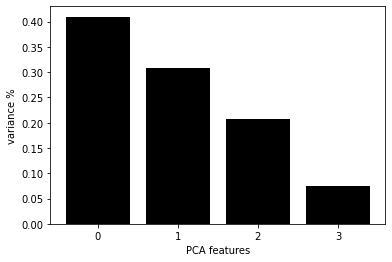

In [ ]:
#Implementation: PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [ ]:
import visuals as vs

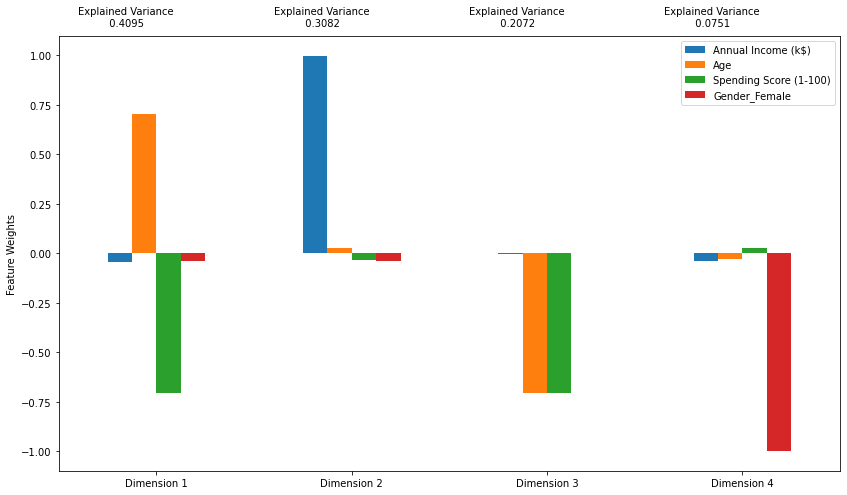

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(df)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(df)

# Generate PCA results plot
pca_results = vs.pca_results(df, pca)

Based on this visualization, we can see that the first two PCA components explain around 70% of the dataset variance.

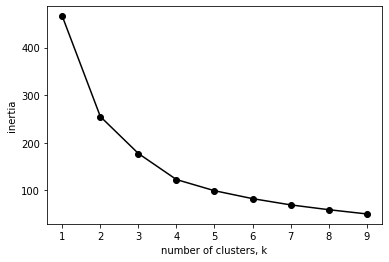

In [ ]:
# Clustering
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

it looks like the optimal number of clusters is 4.




In [ ]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

0.42177622653948804


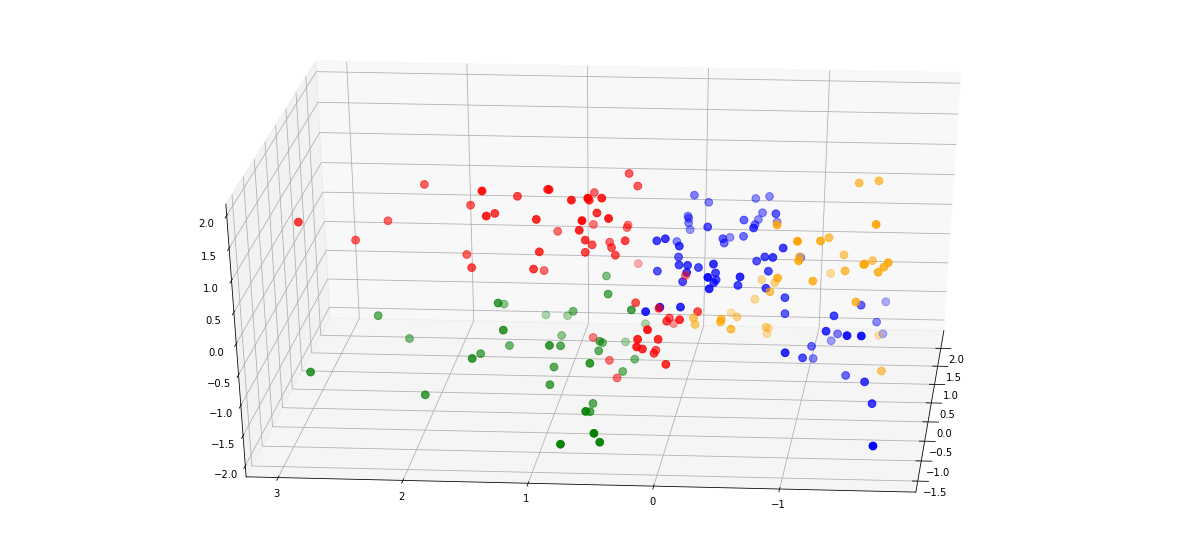

In [ ]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
df["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,3


In [ ]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,52.144928,46.333333,40.072464
1,1,29.932203,78.661017,70.491525
2,2,41.685714,88.228571,17.285714
3,3,25.594595,32.054054,67.864865
